<a href="https://colab.research.google.com/github/YuvrajRakheja/Sparks-Foundation/blob/main/Task_2/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Spark Foundation (GRIP) June 2022 Internship Project

# Data Science and Business Analytics

##Author - Yuvraj Rakheja





#TASK 2: Predicting the optimum number of clusters from given Iris dataset

In [1]:
# Importing all the neccessary libraries

import pandas as pd  # to analyze data
import numpy as np  # to perform a wide variety of mathematical operations on arrays
import seaborn as sns # to visualize random distributions.
import matplotlib.pyplot as plt # to perform data visualization and graphical plotting
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler # to scale the data
from sklearn.cluster import KMeans  # to perform Kmeans Unsuprvised algorithm
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


In [2]:
from google.colab import files
data = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
Iris = pd.read_csv("Iris.csv")

In [4]:
Iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Exploratory Data Analysis

In [5]:
# Print the all the unique species

Iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# Print the null values if there are any

Iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# check dataset info
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# Describe the data
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
Iris.drop(["Species", "Id"], axis = 1, inplace = True)
#Since this is an Unsupervised learning, we'll have to drop target variable ('Species') and 'Id' columns

Data Visualization

In [10]:
X = Iris.iloc[:, [0, 1, 2, 3]].values

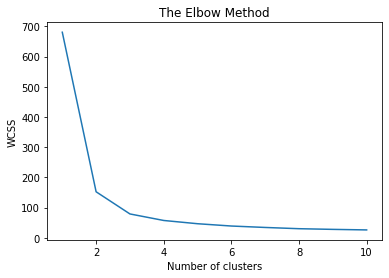

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Plotting the result on line graph

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

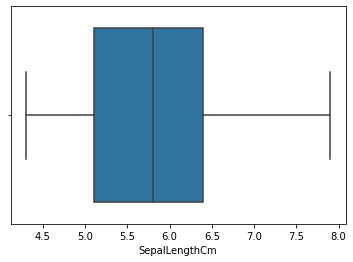

In [12]:
# draw boxplot "SepalLengthCm"

sns.boxplot(x=Iris["SepalLengthCm"])

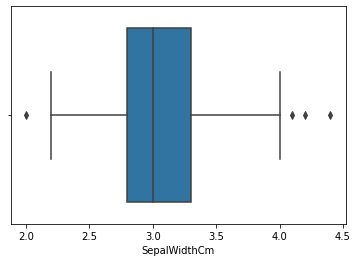

In [13]:
# draw boxplot "SepalWidthCm"

sns.boxplot(x=Iris["SepalWidthCm"])

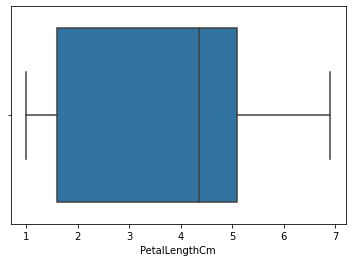

In [14]:
# draw boxplot "PetalLengthCm"

sns.boxplot(x=Iris["PetalLengthCm"])

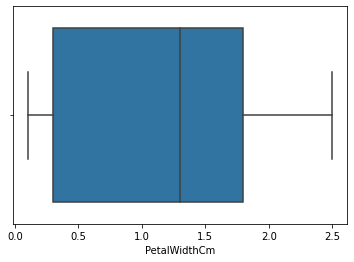

In [15]:
# draw boxplot "PetalWidthCm"

sns.boxplot(x=Iris["PetalWidthCm"])

In [16]:
# Defining and saving the 'MinMax Scaler' function in 'scaler'

scaler = MinMaxScaler()

Creating a best fit cluster model

In [17]:
x = scaler.fit_transform(Iris)

In [18]:
b_f_clusters = range(2,10)

Iris_m = []

In [19]:
for i in b_f_clusters:
    kmeans = KMeans(n_clusters=i, init = "k-means++", random_state=420)
    kmeans.fit(x)
    labels = kmeans.predict(x)
    Iris_m.append(kmeans.inertia_)

In [20]:
len(b_f_clusters) # to find the length of total number of clusters

8

In [21]:
len(Iris_m) # to find the length of iris_m

8

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

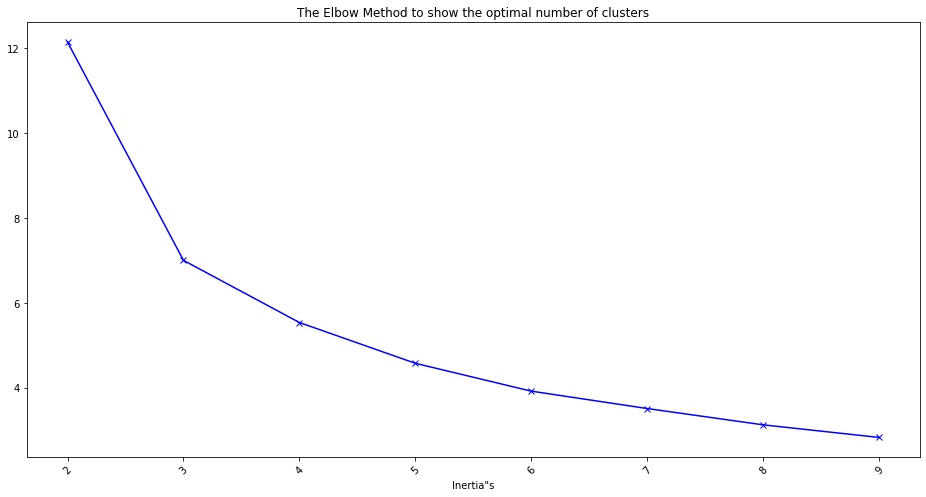

In [23]:
# plotting the graph

plt.figure(figsize=(16,8))
plt.plot(b_f_clusters, Iris_m, "bx-")
plt.xticks(b_f_clusters)
plt.title("The Elbow Method to show the optimal number of clusters")
plt.xlabel("Inertia\"s")
plt.xticks(rotation=(45))
plt.show()

From the graph we can infer that the clusters 3 is the optimal cluster to fit the model.

In [24]:

model = KMeans(n_clusters= 3, random_state=420)

In [25]:
# fit the model

model.fit(x)

KMeans(n_clusters=3, random_state=420)

In [26]:

labels = model.predict(x)

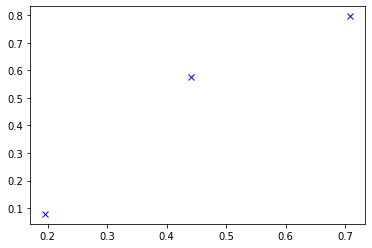

In [27]:
# plotting the clusters graph

centers_x, centers_y =model.cluster_centers_[:,0], model.cluster_centers_[:,2]

# plot the graph
plt.plot(centers_x, centers_y, "xb")

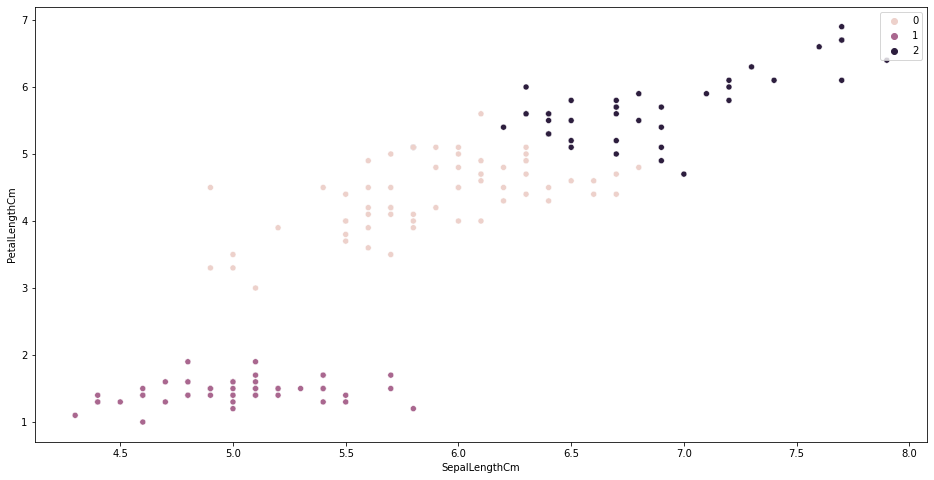

In [28]:
# Plot the graph wiht 'SepalLengthCM' and 'PetalLengthCm'

plt.figure(figsize=(16,8))
sns.scatterplot(x=Iris["SepalLengthCm"], y = Iris["PetalLengthCm"], hue= labels)
plt.show()

With the help of KMeans clustering we can infer that the clusters 3 is the best fit option to get the best model and segreagate data into the right clusters.
---END OF TASK---